In [1]:
pip install -q seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.10.1


In [5]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names, sep = ' ', comment='\t',
                         skipinitialspace=True, na_values='?')

In [6]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [7]:
#Clean the data, The dataset contains a few unknown values
# here 0 means no missing value
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [8]:
#Lets' drop those data
dataset= dataset.dropna()

In [9]:
dataset['Origin']= dataset['Origin'].map({1: 'USA', 2: 'Europh', 3: 'Japan'})

In [10]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europh
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA
397,31.0,4,119.0,82.0,2720.0,19.4,82,USA


In [11]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europh,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [12]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [13]:
print(train_dataset.shape)
print(test_dataset.shape)

(314, 10)
(78, 10)


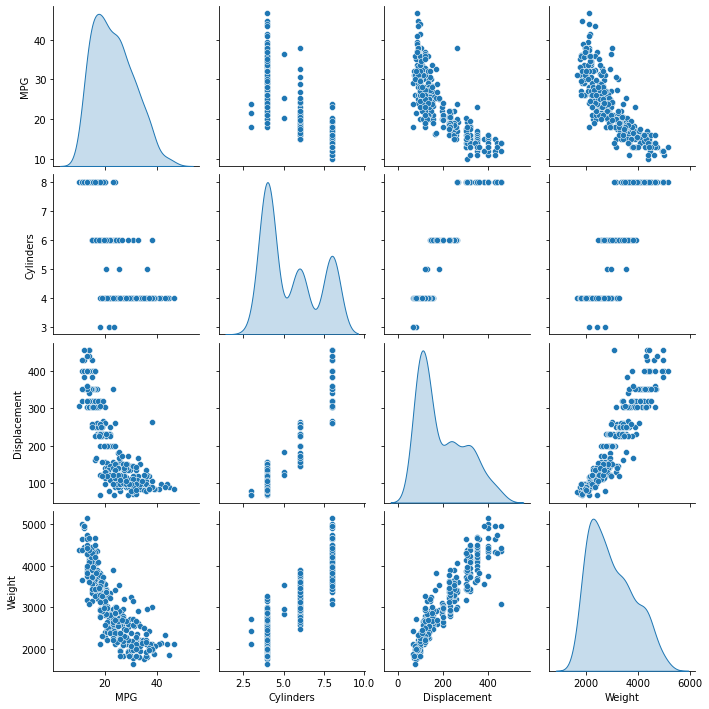

In [14]:
sns.pairplot(train_dataset[['MPG','Cylinders','Displacement','Weight']], diag_kind='kde')

In [15]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europh,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.178344,0.197452,0.624204
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.383413,0.398712,0.485101
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [16]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europh,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [17]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

In [18]:
train_labels = train_features.pop('MPG')
test_labels =test_features.pop('MPG')


In [19]:
train_labels

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64

# Normalization

In [20]:
train_dataset.describe().transpose()[['mean','std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europh,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [21]:
normalizer = tf.keras.layers.Normalization(axis=-1)


In [22]:
normalizer.adapt(np.array(train_features))

In [23]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [24]:
first = np.array(train_features[:1])
with np.printoptions(precision=2, suppress=True):
    print("First_Example: ", first)
    print()
    print('Normalized: ',normalizer(first).numpy())

First_Example:  [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized:  [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


# Linear regression

In [25]:
#Begin with a single-variable linear regression to predict 'MPG' from 'Horsepower'

horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)

horsepower_normalizer.adapt(horsepower)

# Build the Keras Sequential model:

In [26]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [27]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 0s 66ms/step


array([[-0.928],
       [-0.524],
       [ 1.713],
       [-1.301],
       [-1.177],
       [-0.462],
       [-1.394],
       [-1.177],
       [-0.307],
       [-0.524]], dtype=float32)

In [28]:
horsepower_model.compile(
 optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'

)

In [29]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    verbose=1,
    validation_split = 0.2

)

Epoch 1/100
8/8 [==============================] - 0s 36ms/step - loss: 22.8746 - val_loss: 22.9374
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 22.0618 - val_loss: 22.1376
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 21.2616 - val_loss: 21.3376
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 20.4613 - val_loss: 20.5379
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 19.6680 - val_loss: 19.7382
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 18.8640 - val_loss: 18.9380
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 18.0659 - val_loss: 18.1382
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 17.2613 - val_loss: 17.3381
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 16.4619 - val_loss: 16.5380
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 15.6649 - val_loss: 15.7401
Epoch 11

8/8 [==============================] - 0s 5ms/step - loss: 3.8093 - val_loss: 4.1626
Epoch 85/100
8/8 [==============================] - 0s 4ms/step - loss: 3.8194 - val_loss: 4.2096
Epoch 86/100
8/8 [==============================] - 0s 5ms/step - loss: 3.8057 - val_loss: 4.1845
Epoch 87/100
8/8 [==============================] - 0s 4ms/step - loss: 3.8050 - val_loss: 4.1713
Epoch 88/100
8/8 [==============================] - 0s 5ms/step - loss: 3.8039 - val_loss: 4.1876
Epoch 89/100
8/8 [==============================] - 0s 4ms/step - loss: 3.8025 - val_loss: 4.2008
Epoch 90/100
8/8 [==============================] - 0s 4ms/step - loss: 3.8036 - val_loss: 4.1903
Epoch 91/100
8/8 [==============================] - 0s 4ms/step - loss: 3.8034 - val_loss: 4.1927
Epoch 92/100
8/8 [==============================] - 0s 4ms/step - loss: 3.8037 - val_loss: 4.1798
Epoch 93/100
8/8 [==============================] - 0s 4ms/step - loss: 3.8059 - val_loss: 4.1816
Epoch 94/100
8/8 [===============

In [30]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.800954,4.180137,95
96,3.804261,4.168902,96
97,3.804625,4.177154,97
98,3.804428,4.199340,98
99,3.805516,4.192452,99


In [31]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

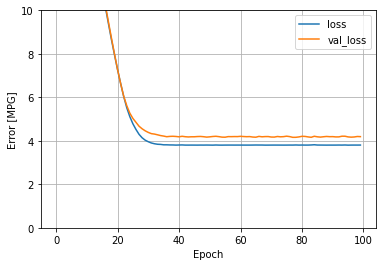

In [32]:
plot_loss(history)

In [33]:
test_result = {}
test_result['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=1

)

3/3 [==============================] - 0s 2ms/step - loss: 3.6424


In [34]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 858us/step


In [35]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

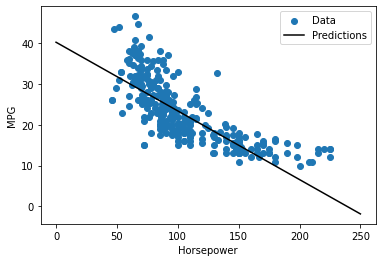

In [36]:
plot_horsepower(x, y)

# Linear regression with multiple inputs

In [37]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [38]:
#When you call Model.predict on a batch of inputs, it produces units=1 outputs for each example:

linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 42ms/step


array([[-0.609],
       [-0.635],
       [ 2.518],
       [-0.558],
       [-1.631],
       [-0.032],
       [-1.971],
       [-3.369],
       [-0.065],
       [-1.705]], dtype=float32)

In [39]:
linear_model.compile(
optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [41]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=1,
    validation_split=0.2,
    
)

Epoch 1/100
8/8 [==============================] - 0s 20ms/step - loss: 21.8463 - val_loss: 22.1179
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 21.0261 - val_loss: 21.3866
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 20.2132 - val_loss: 20.6402
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 19.3827 - val_loss: 19.8866
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 18.5868 - val_loss: 19.1563
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 17.7678 - val_loss: 18.4539
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 16.9621 - val_loss: 17.7210
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 16.1796 - val_loss: 16.9385
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 15.3546 - val_loss: 16.1925
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 14.5656 - val_loss: 15.4818
Epoch 11

8/8 [==============================] - 0s 4ms/step - loss: 2.4654 - val_loss: 2.4867
Epoch 85/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4677 - val_loss: 2.4650
Epoch 86/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4725 - val_loss: 2.4581
Epoch 87/100
8/8 [==============================] - 0s 5ms/step - loss: 2.4787 - val_loss: 2.4887
Epoch 88/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4798 - val_loss: 2.4589
Epoch 89/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4729 - val_loss: 2.4865
Epoch 90/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4912 - val_loss: 2.4923
Epoch 91/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4837 - val_loss: 2.4547
Epoch 92/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4925 - val_loss: 2.5031
Epoch 93/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4763 - val_loss: 2.4481
Epoch 94/100
8/8 [===============

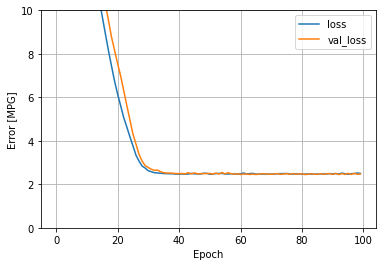

In [42]:
plot_loss(history)

In [43]:
test_result['linear_model']  = linear_model.evaluate(
    test_features, test_labels, verbose=0
)

# Regression with a deep neural network (DNN)

In [44]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
        
    ])
    
    model.compile(
        loss= 'mean_absolute_error',
        optimizer = tf.keras.optimizers.Adam(0.001)
    )
    
    return model

Regression using a DNN and a single input

In [45]:
#Create a DNN model with only 'Horsepower' as input and horsepower_normalizer (defined earlier) as the normalization layer:

dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)


In [46]:
dnn_horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [53]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=1,
    epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 8ms/step - loss: 3.2510 - val_loss: 3.7478
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 3.2476 - val_loss: 3.7515
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 3.2610 - val_loss: 3.7665
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2460 - val_loss: 3.7511
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 3.2449 - val_loss: 3.7492
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2551 - val_loss: 3.7666
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2634 - val_loss: 3.7693
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2503 - val_loss: 3.7480
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2470 - val_loss: 3.7589
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2465 - val_loss: 3.7588
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 3.2144 - val_loss: 3.7840
Epoch 85/100
8/8 [==============================] - 0s 6ms/step - loss: 3.2174 - val_loss: 3.7870
Epoch 86/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2076 - val_loss: 3.7809
Epoch 87/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2100 - val_loss: 3.7795
Epoch 88/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2103 - val_loss: 3.7898
Epoch 89/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2167 - val_loss: 3.7724
Epoch 90/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2156 - val_loss: 3.7848
Epoch 91/100
8/8 [==============================] - 0s 5ms/step - loss: 3.2041 - val_loss: 3.7777
Epoch 92/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2151 - val_loss: 3.7756
Epoch 93/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2244 - val_loss: 3.7878
Epoch 94/100
8/8 [===============

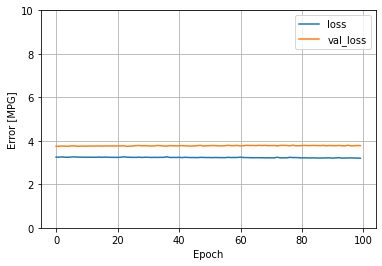

In [54]:
plot_loss(history)

In [55]:
#If you plot the predictions as a function of 'Horsepower', you should notice how this model takes advantage of the nonlinearity provided by the hidden layers:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

8/8 [==============================] - 0s 644us/step


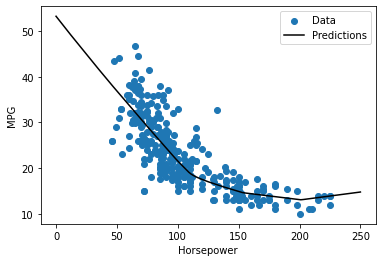

In [56]:
plot_horsepower(x,y)

In [58]:
test_result['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
test_features['Horsepower'],test_labels, verbose=0
)

In [59]:
test_result

{'horsepower_model': 3.6423566341400146,
 'linear_model': 2.522246837615967,
 'dnn_horsepower_model': 2.8547303676605225}

Regression using a DNN and multiple inputs

In [64]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                640       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


# %%time
history = dnn_model.fit(
    train_features,
    train_labels,
    verbose=1,
    epochs=100,
    validation_split=0.2
    
)

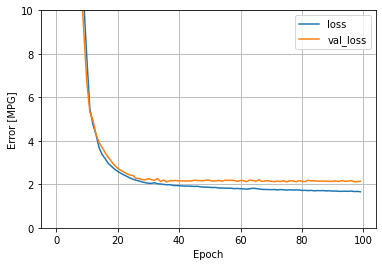

In [66]:
plot_loss(history)

In [68]:
test_result['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

# Performance

In [71]:
pd.DataFrame(test_result, index=["Mean absolute error[MPG]"]).T

,Mean absolute error[MPG]
horsepower_model,3.642357
linear_model,2.522247
dnn_horsepower_model,2.854730
dnn_model,1.653051


3/3 [==============================] - 0s 1ms/step


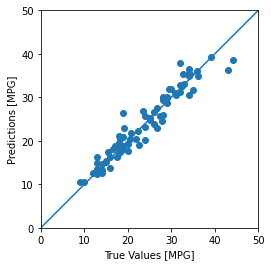

In [72]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

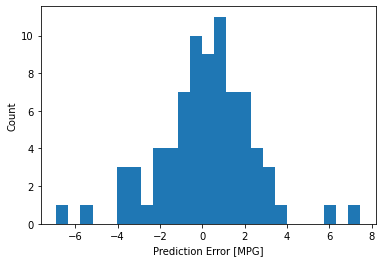

In [73]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [74]:
#Model save
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model\assets


In [77]:
#If you reload the model, it gives identical output:

reloaded = tf.keras.models.load_model('dnn_model')
test_result['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0
)

In [79]:
pd.DataFrame(test_result, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.642357
linear_model,2.522247
dnn_horsepower_model,2.854730
dnn_model,1.653051
reloaded,1.653051
